In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd


with open("/content/drive/MyDrive/test.ft.txt", "r", encoding="utf-8") as f:
    lines = f.readlines()

data = []
for line in lines:
    line = line.strip()
    if line:

        label, text = line.split(" ", 1)
        data.append([label, text])


df = pd.DataFrame(data, columns=["label", "text"])

df["tokens"] = df["text"].apply(lambda x: x.split())

print(df.head())


        label                                               text  \
0  __label__2  Great CD: My lovely Pat has one of the GREAT v...   
1  __label__2  One of the best game music soundtracks - for a...   
2  __label__1  Batteries died within a year ...: I bought thi...   
3  __label__2  works fine, but Maha Energy is better: Check o...   
4  __label__2  Great for the non-audiophile: Reviewed quite a...   

                                              tokens  
0  [Great, CD:, My, lovely, Pat, has, one, of, th...  
1  [One, of, the, best, game, music, soundtracks,...  
2  [Batteries, died, within, a, year, ...:, I, bo...  
3  [works, fine,, but, Maha, Energy, is, better:,...  
4  [Great, for, the, non-audiophile:, Reviewed, q...  


In [ ]:
df["text_cf"] = df["text"].str.lower()
df.head()


,label,text,tokens,text_cf
0,__label__2,Great CD: My lovely Pat has one of the GREAT v...,"[Great, CD:, My, lovely, Pat, has, one, of, th...",great cd: my lovely pat has one of the great v...
1,__label__2,One of the best game music soundtracks - for a...,"[One, of, the, best, game, music, soundtracks,...",one of the best game music soundtracks - for a...
2,__label__1,Batteries died within a year ...: I bought thi...,"[Batteries, died, within, a, year, ...:, I, bo...",batteries died within a year ...: i bought thi...
3,__label__2,"works fine, but Maha Energy is better: Check o...","[works, fine,, but, Maha, Energy, is, better:,...","works fine, but maha energy is better: check o..."
4,__label__2,Great for the non-audiophile: Reviewed quite a...,"[Great, for, the, non-audiophile:, Reviewed, q...",great for the non-audiophile: reviewed quite a...


In [ ]:
import re

def remove_punct(text):
    return re.sub(r'[^\w\s]', '', text)

df["text_nopunct"] = df["text_cf"].apply(remove_punct)
df.head()


,label,text,tokens,text_cf,text_nopunct
0,__label__2,Great CD: My lovely Pat has one of the GREAT v...,"[Great, CD:, My, lovely, Pat, has, one, of, th...",great cd: my lovely pat has one of the great v...,great cd my lovely pat has one of the great vo...
1,__label__2,One of the best game music soundtracks - for a...,"[One, of, the, best, game, music, soundtracks,...",one of the best game music soundtracks - for a...,one of the best game music soundtracks for a ...
2,__label__1,Batteries died within a year ...: I bought thi...,"[Batteries, died, within, a, year, ...:, I, bo...",batteries died within a year ...: i bought thi...,batteries died within a year i bought this ch...
3,__label__2,"works fine, but Maha Energy is better: Check o...","[works, fine,, but, Maha, Energy, is, better:,...","works fine, but maha energy is better: check o...",works fine but maha energy is better check out...
4,__label__2,Great for the non-audiophile: Reviewed quite a...,"[Great, for, the, non-audiophile:, Reviewed, q...",great for the non-audiophile: reviewed quite a...,great for the nonaudiophile reviewed quite a b...


In [10]:
import nltk
from nltk.tokenize import word_tokenize


nltk.download('punkt')


df["text_nopunct"] = df["text_nopunct"].astype(str)


df["tokens"] = df["text_nopunct"].apply(word_tokenize)

df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,label,text,tokens,text_cf,text_nopunct
0,__label__2,Great CD: My lovely Pat has one of the GREAT v...,"[great, cd, my, lovely, pat, has, one, of, the...",great cd: my lovely pat has one of the great v...,great cd my lovely pat has one of the great vo...
1,__label__2,One of the best game music soundtracks - for a...,"[one, of, the, best, game, music, soundtracks,...",one of the best game music soundtracks - for a...,one of the best game music soundtracks for a ...
2,__label__1,Batteries died within a year ...: I bought thi...,"[batteries, died, within, a, year, i, bought, ...",batteries died within a year ...: i bought thi...,batteries died within a year i bought this ch...
3,__label__2,"works fine, but Maha Energy is better: Check o...","[works, fine, but, maha, energy, is, better, c...","works fine, but maha energy is better: check o...",works fine but maha energy is better check out...
4,__label__2,Great for the non-audiophile: Reviewed quite a...,"[great, for, the, nonaudiophile, reviewed, qui...",great for the non-audiophile: reviewed quite a...,great for the nonaudiophile reviewed quite a b...


In [12]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

df["tokens_nostop"] = df["tokens"].apply(lambda toks: [w for w in toks if w not in stop_words])
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,label,text,tokens,text_cf,text_nopunct,tokens_nostop
0,__label__2,Great CD: My lovely Pat has one of the GREAT v...,"[great, cd, my, lovely, pat, has, one, of, the...",great cd: my lovely pat has one of the great v...,great cd my lovely pat has one of the great vo...,"[great, cd, lovely, pat, one, great, voices, g..."
1,__label__2,One of the best game music soundtracks - for a...,"[one, of, the, best, game, music, soundtracks,...",one of the best game music soundtracks - for a...,one of the best game music soundtracks for a ...,"[one, best, game, music, soundtracks, game, di..."
2,__label__1,Batteries died within a year ...: I bought thi...,"[batteries, died, within, a, year, i, bought, ...",batteries died within a year ...: i bought thi...,batteries died within a year i bought this ch...,"[batteries, died, within, year, bought, charge..."
3,__label__2,"works fine, but Maha Energy is better: Check o...","[works, fine, but, maha, energy, is, better, c...","works fine, but maha energy is better: check o...",works fine but maha energy is better check out...,"[works, fine, maha, energy, better, check, mah..."
4,__label__2,Great for the non-audiophile: Reviewed quite a...,"[great, for, the, nonaudiophile, reviewed, qui...",great for the non-audiophile: reviewed quite a...,great for the nonaudiophile reviewed quite a b...,"[great, nonaudiophile, reviewed, quite, bit, c..."


In [13]:
nltk.download('wordnet')
from nltk.corpus import wordnet

def synonym_sub(tokens):
    new_tokens = []
    for w in tokens:
        syns = wordnet.synsets(w)
        if syns:
            new_tokens.append(syns[0].lemmas()[0].name())
        else:
            new_tokens.append(w)
    return new_tokens

df["tokens_syn"] = df["tokens_nostop"].apply(synonym_sub)
df.head()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,label,text,tokens,text_cf,text_nopunct,tokens_nostop,tokens_syn
0,__label__2,Great CD: My lovely Pat has one of the GREAT v...,"[great, cd, my, lovely, pat, has, one, of, the...",great cd: my lovely pat has one of the great v...,great cd my lovely pat has one of the great vo...,"[great, cd, lovely, pat, one, great, voices, g...","[great, cadmium, cover_girl, pat, one, great, ..."
1,__label__2,One of the best game music soundtracks - for a...,"[one, of, the, best, game, music, soundtracks,...",one of the best game music soundtracks - for a...,one of the best game music soundtracks for a ...,"[one, best, game, music, soundtracks, game, di...","[one, best, game, music, soundtrack, game, did..."
2,__label__1,Batteries died within a year ...: I bought thi...,"[batteries, died, within, a, year, i, bought, ...",batteries died within a year ...: i bought thi...,batteries died within a year i bought this ch...,"[batteries, died, within, year, bought, charge...","[battery, die, inside, year, buy, charger, jul..."
3,__label__2,"works fine, but Maha Energy is better: Check o...","[works, fine, but, maha, energy, is, better, c...","works fine, but maha energy is better: check o...",works fine but maha energy is better check out...,"[works, fine, maha, energy, better, check, mah...","[plant, fine, Omaha, energy, better, check, Om..."
4,__label__2,Great for the non-audiophile: Reviewed quite a...,"[great, for, the, nonaudiophile, reviewed, qui...",great for the non-audiophile: reviewed quite a...,great for the nonaudiophile reviewed quite a b...,"[great, nonaudiophile, reviewed, quite, bit, c...","[great, nonaudiophile, review, quite, spot, ja..."


In [14]:
from nltk.stem import WordNetLemmatizer

wl = WordNetLemmatizer()

df["tokens_lemma"] = df["tokens_syn"].apply(lambda toks: [wl.lemmatize(w) for w in toks])
df.head()


,label,text,tokens,text_cf,text_nopunct,tokens_nostop,tokens_syn,tokens_lemma
0,__label__2,Great CD: My lovely Pat has one of the GREAT v...,"[great, cd, my, lovely, pat, has, one, of, the...",great cd: my lovely pat has one of the great v...,great cd my lovely pat has one of the great vo...,"[great, cd, lovely, pat, one, great, voices, g...","[great, cadmium, cover_girl, pat, one, great, ...","[great, cadmium, cover_girl, pat, one, great, ..."
1,__label__2,One of the best game music soundtracks - for a...,"[one, of, the, best, game, music, soundtracks,...",one of the best game music soundtracks - for a...,one of the best game music soundtracks for a ...,"[one, best, game, music, soundtracks, game, di...","[one, best, game, music, soundtrack, game, did...","[one, best, game, music, soundtrack, game, did..."
2,__label__1,Batteries died within a year ...: I bought thi...,"[batteries, died, within, a, year, i, bought, ...",batteries died within a year ...: i bought thi...,batteries died within a year i bought this ch...,"[batteries, died, within, year, bought, charge...","[battery, die, inside, year, buy, charger, jul...","[battery, die, inside, year, buy, charger, jul..."
3,__label__2,"works fine, but Maha Energy is better: Check o...","[works, fine, but, maha, energy, is, better, c...","works fine, but maha energy is better: check o...",works fine but maha energy is better check out...,"[works, fine, maha, energy, better, check, mah...","[plant, fine, Omaha, energy, better, check, Om...","[plant, fine, Omaha, energy, better, check, Om..."
4,__label__2,Great for the non-audiophile: Reviewed quite a...,"[great, for, the, nonaudiophile, reviewed, qui...",great for the non-audiophile: reviewed quite a...,great for the nonaudiophile reviewed quite a b...,"[great, nonaudiophile, reviewed, quite, bit, c...","[great, nonaudiophile, review, quite, spot, ja...","[great, nonaudiophile, review, quite, spot, ja..."


In [15]:
df["processed_text"] = df["tokens_lemma"].apply(lambda toks: ' '.join(toks))
df.head()


,label,text,tokens,text_cf,text_nopunct,tokens_nostop,tokens_syn,tokens_lemma,processed_text
0,__label__2,Great CD: My lovely Pat has one of the GREAT v...,"[great, cd, my, lovely, pat, has, one, of, the...",great cd: my lovely pat has one of the great v...,great cd my lovely pat has one of the great vo...,"[great, cd, lovely, pat, one, great, voices, g...","[great, cadmium, cover_girl, pat, one, great, ...","[great, cadmium, cover_girl, pat, one, great, ...",great cadmium cover_girl pat one great voice c...
1,__label__2,One of the best game music soundtracks - for a...,"[one, of, the, best, game, music, soundtracks,...",one of the best game music soundtracks - for a...,one of the best game music soundtracks for a ...,"[one, best, game, music, soundtracks, game, di...","[one, best, game, music, soundtrack, game, did...","[one, best, game, music, soundtrack, game, did...",one best game music soundtrack game didnt trul...
2,__label__1,Batteries died within a year ...: I bought thi...,"[batteries, died, within, a, year, i, bought, ...",batteries died within a year ...: i bought thi...,batteries died within a year i bought this ch...,"[batteries, died, within, year, bought, charge...","[battery, die, inside, year, buy, charger, jul...","[battery, die, inside, year, buy, charger, jul...",battery die inside year buy charger jul 2003 w...
3,__label__2,"works fine, but Maha Energy is better: Check o...","[works, fine, but, maha, energy, is, better, c...","works fine, but maha energy is better: check o...",works fine but maha energy is better check out...,"[works, fine, maha, energy, better, check, mah...","[plant, fine, Omaha, energy, better, check, Om...","[plant, fine, Omaha, energy, better, check, Om...",plant fine Omaha energy better check Omaha ene...
4,__label__2,Great for the non-audiophile: Reviewed quite a...,"[great, for, the, nonaudiophile, reviewed, qui...",great for the non-audiophile: reviewed quite a...,great for the nonaudiophile reviewed quite a b...,"[great, nonaudiophile, reviewed, quite, bit, c...","[great, nonaudiophile, review, quite, spot, ja...","[great, nonaudiophile, review, quite, spot, ja...",great nonaudiophile review quite spot jazz_ban...


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000)

X = vectorizer.fit_transform(df["processed_text"])
y = df["label"]



In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [20]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.837675
Precision: 0.8376915468857975
Recall: 0.837675
F1 score: 0.8376730114943908

Classification Report:
               precision    recall  f1-score   support

  __label__1       0.84      0.84      0.84     40000
  __label__2       0.84      0.83      0.84     40000

    accuracy                           0.84     80000
   macro avg       0.84      0.84      0.84     80000
weighted avg       0.84      0.84      0.84     80000



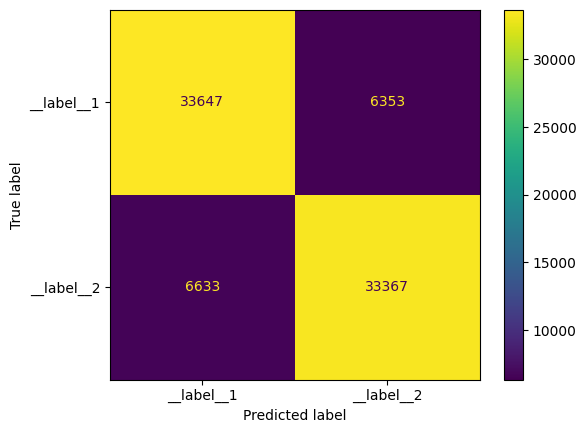

In [22]:

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

confusion_matrix = confusion_matrix(y_test, y_pred)


cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = model.classes_)


cm_display.plot()
plt.show()